## Задача:
#### рассчитать показатель кумулятивного ARPU (average revenue per user) для каждой когорты для каждого дня

In [1]:
import pandas as pd
from datetime import datetime, date, timedelta

In [2]:
# загрузим основную таблицу, в которой содержится информация о пользователе, стране в которой он находится,
# установленном приложении, дате установки, дней прошедших с установки, кол-ве показов рекламы, ее типе

In [3]:
events_data = pd.read_csv('events_data.csv')
events_data

,Unnamed: 0,date,app,version,network,event_type,installs,days_after_installs,country,events_amount
0,0,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,0,US,757128.0
1,1,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,1,US,799973.0
2,2,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,2,US,655098.0
3,3,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,3,US,713709.0
4,4,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,4,US,588658.0
...,...,...,...,...,...,...,...,...,...,...
835375,39,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,39,ES,1125075.0
835376,40,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,40,ES,1366665.0
835377,41,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,41,ES,1069572.0
835378,42,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,42,ES,1354628.0


In [4]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835380 entries, 0 to 835379
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           835380 non-null  int64  
 1   date                 835380 non-null  object 
 2   app                  835380 non-null  object 
 3   version              835380 non-null  float64
 4   network              835380 non-null  object 
 5   event_type           835380 non-null  object 
 6   installs             835380 non-null  int64  
 7   days_after_installs  835380 non-null  int64  
 8   country              835380 non-null  object 
 9   events_amount        835380 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 63.7+ MB


In [5]:
events_data.drop('Unnamed: 0', axis=1, inplace=True)

events_data['date'] = pd.to_datetime(events_data['date'])
events_data['first_day'] = events_data['date'].dt.date

In [6]:
#  добавим поле 'current_day', которое будет показывать календарный день пользования установленным приложением
events_data['current_day'] = events_data['first_day'] + pd.to_timedelta(events_data['days_after_installs'], unit="D")
events_data

C:\Users\Roman\Anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized
  PerformanceWarning,


,date,app,version,network,event_type,installs,days_after_installs,country,events_amount,first_day,current_day
0,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,0,US,757128.0,2021-06-30,2021-06-30
1,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,1,US,799973.0,2021-06-30,2021-07-01
2,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,2,US,655098.0,2021-06-30,2021-07-02
3,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,3,US,713709.0,2021-06-30,2021-07-03
4,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,4,US,588658.0,2021-06-30,2021-07-04
...,...,...,...,...,...,...,...,...,...,...,...
835375,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,39,ES,1125075.0,2021-07-20,2021-08-28
835376,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,40,ES,1366665.0,2021-07-20,2021-08-29
835377,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,41,ES,1069572.0,2021-07-20,2021-08-30
835378,2021-07-20 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72281,42,ES,1354628.0,2021-07-20,2021-08-31


In [7]:
# посмотрим какие значения принимают поля

In [8]:
print('app =', list(events_data.app.unique()))
print('version = ', list(events_data.version.unique()))
print('network = ', list(events_data.network.unique()))
print('event_type = ', list(events_data.event_type.unique()))
print('country = ', list(events_data.country.unique()))

app = ['awesome app A', 'brilliant app B']
version =  [1.0, 1.1, 2.0, 2.2]
network =  ['AdNetwork P', 'AdNetwork Q', 'AdNetwork S']
event_type =  ['interstitial', 'banner']
country =  ['US', 'GB', 'CA', 'AU', 'RU', 'BR', 'DE', 'FR', 'JP', 'KR', 'MX', 'VN', 'IN', 'ID', 'TR', 'IT', 'ES']


In [9]:
# узнаем сколько всего уникальных пользователей
events_data.installs.nunique()

7718

In [10]:
# проверим, что по каждому приложению происходит показ обоих типов рекламы
events_data[events_data['days_after_installs'] == 0].\
    groupby(['installs', 'app'], as_index=False).\
    agg(event_type_count=('event_type', 'count')).\
    sort_values(by=['event_type_count', 'installs'], ascending=[False, True])

,installs,app,event_type_count
2506,84012,awesome app A,8
5545,99599,brilliant app B,8
5906,100402,brilliant app B,8
6034,100727,awesome app A,8
83,71859,awesome app A,6
...,...,...,...
8409,125175,awesome app A,2
8410,125217,awesome app A,2
8411,125220,awesome app A,2
8412,125221,awesome app A,2


In [11]:
# посмотрим на одного из пользователей (например, 84012), у которого event_type_count > 2
# по какой-то причине этот пользователь устанавливал приложение 'awesome app A' несколько раз
# разных версий (1.0 и 2.0) и в разных странах (FR и CA)
# но факт, что при установке приложения показываются оба вида рекламы подтверждается
events_data[(events_data['days_after_installs'] == 0) &
            (events_data['installs'] == 84012)].sort_values(by='first_day')

,date,app,version,network,event_type,installs,days_after_installs,country,events_amount,first_day,current_day
30624,2021-06-19 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,84012,0,FR,493670.0,2021-06-19,2021-06-19
30699,2021-06-19 14:25:35.063117,awesome app A,1.0,AdNetwork P,banner,84012,0,FR,13774842.0,2021-06-19,2021-06-19
431912,2021-07-02 14:25:35.063117,brilliant app B,2.0,AdNetwork P,interstitial,84012,0,CA,532925.0,2021-07-02,2021-07-02
431974,2021-07-02 14:25:35.063117,brilliant app B,2.0,AdNetwork P,banner,84012,0,CA,12200294.0,2021-07-02,2021-07-02
372096,2021-08-03 14:25:35.063117,awesome app A,2.0,AdNetwork P,interstitial,84012,0,FR,717745.0,2021-08-03,2021-08-03
372126,2021-08-03 14:25:35.063117,awesome app A,2.0,AdNetwork P,banner,84012,0,FR,12795837.0,2021-08-03,2021-08-03
371498,2021-08-16 14:25:35.063117,awesome app A,2.0,AdNetwork P,interstitial,84012,0,FR,685253.0,2021-08-16,2021-08-16
371515,2021-08-16 14:25:35.063117,awesome app A,2.0,AdNetwork P,banner,84012,0,FR,14048533.0,2021-08-16,2021-08-16
366128,2021-08-19 14:25:35.063117,awesome app A,2.0,AdNetwork P,interstitial,84012,0,CA,492795.0,2021-08-19,2021-08-19
366142,2021-08-19 14:25:35.063117,awesome app A,2.0,AdNetwork P,banner,84012,0,CA,13300963.0,2021-08-19,2021-08-19


In [12]:
events_data_A = events_data[(events_data['days_after_installs'] == 0) & 
                            (events_data['app'] == 'awesome app A') & 
                            (events_data['event_type'] == 'interstitial')].\
    sort_values(by=['first_day', 'installs'])[['first_day', 'installs']]
events_data_A['app_A'] = 1

In [13]:
events_data_B = events_data[(events_data['days_after_installs'] == 0) & 
                            (events_data['app'] == 'brilliant app B') & 
                            (events_data['event_type'] == 'interstitial')].\
    sort_values(by=['first_day', 'installs'])[['first_day', 'installs']]
events_data_B['app_B'] = 1

In [14]:
# определим пользователей, которые установили оба приложения
# оказалось, что только 853 пользователя (из 7718) установили оба приложения
events_data_AB = pd.merge(events_data_A, 
                          events_data_B, 
                          on=['installs'], how='inner')
events_data_AB

,first_day_x,installs,app_A,first_day_y,app_B
0,2021-06-04,79855,1,2021-08-19,1
1,2021-06-04,82886,1,2021-08-06,1
2,2021-06-04,87270,1,2021-06-24,1
3,2021-06-04,93229,1,2021-07-10,1
4,2021-06-04,95617,1,2021-06-14,1
...,...,...,...,...,...
848,2021-09-01,84090,1,2021-06-16,1
849,2021-09-01,87830,1,2021-06-17,1
850,2021-09-01,99651,1,2021-08-10,1
851,2021-09-01,100500,1,2021-06-10,1


In [15]:
# процент пользователей установивших оба приложения
len(events_data_AB)/events_data.installs.nunique()*100

11.052086032650946

In [16]:
# сформируем кагорты и присвоим им номера
# для этого возьмем польфзователей только что установивших приложение (days_after_installs = 0)
# и сгруппируем их по дате установки (first_day)

In [17]:
events_data_cohorts = events_data[events_data['days_after_installs'] == 0].\
    groupby('first_day', as_index=False).\
    agg(installs_nunique=('installs', 'nunique')).\
    sort_values(by='first_day')
events_data_cohorts['cohort'] = events_data_cohorts.index + 1
events_data_cohorts

,first_day,installs_nunique,cohort
0,2021-06-04,101,1
1,2021-06-05,102,2
2,2021-06-06,102,3
3,2021-06-07,102,4
4,2021-06-08,102,5
...,...,...,...
85,2021-08-28,102,86
86,2021-08-29,102,87
87,2021-08-30,102,88
88,2021-08-31,102,89


In [18]:
# интересно, что в каждой когорте около 100 пользователей (от 99 до 102)
events_data_cohorts.sort_values(by='installs_nunique', ascending=False)

,first_day,installs_nunique,cohort
45,2021-07-19,102,46
41,2021-07-15,102,42
62,2021-08-05,102,63
61,2021-08-04,102,62
60,2021-08-03,102,61
...,...,...,...
20,2021-06-24,101,21
25,2021-06-29,101,26
0,2021-06-04,101,1
32,2021-07-06,100,33


In [19]:
# добавим номер кагорты в основную таблицу

In [20]:
events_data_cohorts = pd.merge(events_data, 
                               events_data_cohorts[['first_day', 'cohort']], 
                               on='first_day', 
                               how='inner')
events_data_cohorts

,date,app,version,network,event_type,installs,days_after_installs,country,events_amount,first_day,current_day,cohort
0,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,0,US,757128.0,2021-06-30,2021-06-30,27
1,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,1,US,799973.0,2021-06-30,2021-07-01,27
2,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,2,US,655098.0,2021-06-30,2021-07-02,27
3,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,3,US,713709.0,2021-06-30,2021-07-03,27
4,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,4,US,588658.0,2021-06-30,2021-07-04,27
...,...,...,...,...,...,...,...,...,...,...,...,...
835375,2021-08-01 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72347,27,ES,1995542.0,2021-08-01,2021-08-28,59
835376,2021-08-01 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72347,28,ES,1819235.0,2021-08-01,2021-08-29,59
835377,2021-08-01 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72347,29,ES,1887806.0,2021-08-01,2021-08-30,59
835378,2021-08-01 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72347,30,ES,1656350.0,2021-08-01,2021-08-31,59


In [21]:
# посмотрим на пользователя (installs = 84012), который устанавливал приложение несколько раз
# при каждой последующей установке приложения он попадает в новую кагорту
events_data_cohorts[(events_data_cohorts['days_after_installs'] == 0) &
                    (events_data_cohorts['installs'] == 84012)].sort_values(by='first_day')

,date,app,version,network,event_type,installs,days_after_installs,country,events_amount,first_day,current_day,cohort
155886,2021-06-19 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,84012,0,FR,493670.0,2021-06-19,2021-06-19,16
155961,2021-06-19 14:25:35.063117,awesome app A,1.0,AdNetwork P,banner,84012,0,FR,13774842.0,2021-06-19,2021-06-19,16
708740,2021-07-02 14:25:35.063117,brilliant app B,2.0,AdNetwork P,interstitial,84012,0,CA,532925.0,2021-07-02,2021-07-02,29
708802,2021-07-02 14:25:35.063117,brilliant app B,2.0,AdNetwork P,banner,84012,0,CA,12200294.0,2021-07-02,2021-07-02,29
816828,2021-08-03 14:25:35.063117,awesome app A,2.0,AdNetwork P,interstitial,84012,0,FR,717745.0,2021-08-03,2021-08-03,61
816858,2021-08-03 14:25:35.063117,awesome app A,2.0,AdNetwork P,banner,84012,0,FR,12795837.0,2021-08-03,2021-08-03,61
755650,2021-08-16 14:25:35.063117,awesome app A,2.0,AdNetwork P,interstitial,84012,0,FR,685253.0,2021-08-16,2021-08-16,74
755667,2021-08-16 14:25:35.063117,awesome app A,2.0,AdNetwork P,banner,84012,0,FR,14048533.0,2021-08-16,2021-08-16,74
746288,2021-08-19 14:25:35.063117,awesome app A,2.0,AdNetwork P,interstitial,84012,0,CA,492795.0,2021-08-19,2021-08-19,77
746302,2021-08-19 14:25:35.063117,awesome app A,2.0,AdNetwork P,banner,84012,0,CA,13300963.0,2021-08-19,2021-08-19,77


In [22]:
# загрузим информацию о стоимости показов рекламы

In [23]:
ecpm_aggr = pd.read_csv('ecpm_aggr.csv')
ecpm_aggr

,Unnamed: 0,ecpm_value,date,app,country,ecpm_type
0,0,0.757282,2021-06-04 13:30:27.883259,awesome app A,US,banner
1,1,0.788831,2021-06-05 13:30:27.883259,awesome app A,US,banner
2,2,0.796442,2021-06-06 13:30:27.883259,awesome app A,US,banner
3,3,0.807773,2021-06-07 13:30:27.883259,awesome app A,US,banner
4,4,0.747525,2021-06-08 13:30:27.883259,awesome app A,US,banner
...,...,...,...,...,...,...
6115,85,9.126382,2021-08-28 13:30:27.883259,brilliant app B,ES,interstitial
6116,86,9.451709,2021-08-29 13:30:27.883259,brilliant app B,ES,interstitial
6117,87,8.875883,2021-08-30 13:30:27.883259,brilliant app B,ES,interstitial
6118,88,8.879324,2021-08-31 13:30:27.883259,brilliant app B,ES,interstitial


In [24]:
ecpm_aggr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6120 non-null   int64  
 1   ecpm_value  6120 non-null   float64
 2   date        6120 non-null   object 
 3   app         6120 non-null   object 
 4   country     6120 non-null   object 
 5   ecpm_type   6120 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 287.0+ KB


In [25]:
ecpm_aggr.drop('Unnamed: 0', axis=1, inplace=True)

ecpm_aggr['date'] = pd.to_datetime(ecpm_aggr['date'])
ecpm_aggr['day'] = ecpm_aggr['date'].dt.date
ecpm_aggr

,ecpm_value,date,app,country,ecpm_type,day
0,0.757282,2021-06-04 13:30:27.883259,awesome app A,US,banner,2021-06-04
1,0.788831,2021-06-05 13:30:27.883259,awesome app A,US,banner,2021-06-05
2,0.796442,2021-06-06 13:30:27.883259,awesome app A,US,banner,2021-06-06
3,0.807773,2021-06-07 13:30:27.883259,awesome app A,US,banner,2021-06-07
4,0.747525,2021-06-08 13:30:27.883259,awesome app A,US,banner,2021-06-08
...,...,...,...,...,...,...
6115,9.126382,2021-08-28 13:30:27.883259,brilliant app B,ES,interstitial,2021-08-28
6116,9.451709,2021-08-29 13:30:27.883259,brilliant app B,ES,interstitial,2021-08-29
6117,8.875883,2021-08-30 13:30:27.883259,brilliant app B,ES,interstitial,2021-08-30
6118,8.879324,2021-08-31 13:30:27.883259,brilliant app B,ES,interstitial,2021-08-31


In [26]:
# выручка за тысячу показов рекламы (eCPM - effective cost per mile) различная
# и зависит от типа рекламы, установленного приложения, страны и дня показа

In [27]:
ecpm_aggr[(ecpm_aggr['day'] == date(2021, 6, 4))]

,ecpm_value,date,app,country,ecpm_type,day
0,0.757282,2021-06-04 13:30:27.883259,awesome app A,US,banner,2021-06-04
90,11.628155,2021-06-04 13:30:27.883259,awesome app A,US,interstitial,2021-06-04
180,0.754657,2021-06-04 13:30:27.883259,awesome app A,GB,banner,2021-06-04
270,10.743824,2021-06-04 13:30:27.883259,awesome app A,GB,interstitial,2021-06-04
360,0.772030,2021-06-04 13:30:27.883259,awesome app A,CA,banner,2021-06-04
...,...,...,...,...,...,...
5670,8.363549,2021-06-04 13:30:27.883259,brilliant app B,TR,interstitial,2021-06-04
5760,0.760122,2021-06-04 13:30:27.883259,brilliant app B,IT,banner,2021-06-04
5850,11.092034,2021-06-04 13:30:27.883259,brilliant app B,IT,interstitial,2021-06-04
5940,0.616927,2021-06-04 13:30:27.883259,brilliant app B,ES,banner,2021-06-04


In [28]:
# однозначная идентификация
ecpm_aggr[(ecpm_aggr['ecpm_type'] == 'interstitial') &
          (ecpm_aggr['app'] == 'awesome app A') &
          (ecpm_aggr['country'] == 'US') &
          (ecpm_aggr['day'] == date(2021, 6, 4))]

,ecpm_value,date,app,country,ecpm_type,day
90,11.628155,2021-06-04 13:30:27.883259,awesome app A,US,interstitial,2021-06-04


In [29]:
# добавим в основную таблицу данные о выручке за тысячу показов

In [30]:
events_data_cohorts = pd.merge(events_data_cohorts, 
                               ecpm_aggr[['ecpm_value', 'app', 'country', 'ecpm_type', 'day']], 
                               left_on=['current_day', 'app', 'event_type', 'country'],
                               right_on=['day', 'app', 'ecpm_type', 'country'],
                               how='left')
events_data_cohorts.drop(['ecpm_type', 'day'], axis=1, inplace=True)
events_data_cohorts

,date,app,version,network,event_type,installs,days_after_installs,country,events_amount,first_day,current_day,cohort,ecpm_value
0,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,0,US,757128.0,2021-06-30,2021-06-30,27,11.344681
1,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,1,US,799973.0,2021-06-30,2021-07-01,27,10.696771
2,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,2,US,655098.0,2021-06-30,2021-07-02,27,11.071604
3,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,3,US,713709.0,2021-06-30,2021-07-03,27,11.500480
4,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,4,US,588658.0,2021-06-30,2021-07-04,27,11.446152
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835375,2021-08-01 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72347,27,ES,1995542.0,2021-08-01,2021-08-28,59,0.636744
835376,2021-08-01 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72347,28,ES,1819235.0,2021-08-01,2021-08-29,59,0.662449
835377,2021-08-01 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72347,29,ES,1887806.0,2021-08-01,2021-08-30,59,0.673848
835378,2021-08-01 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72347,30,ES,1656350.0,2021-08-01,2021-08-31,59,0.662416


In [31]:
# ... и рассчитаем выручку за день

In [32]:
events_data_cohorts['revenue_for_day'] = events_data_cohorts['events_amount'] / 1000 * events_data_cohorts['ecpm_value']
events_data_cohorts

,date,app,version,network,event_type,installs,days_after_installs,country,events_amount,first_day,current_day,cohort,ecpm_value,revenue_for_day
0,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,0,US,757128.0,2021-06-30,2021-06-30,27,11.344681,8589.375859
1,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,1,US,799973.0,2021-06-30,2021-07-01,27,10.696771,8557.127849
2,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,2,US,655098.0,2021-06-30,2021-07-02,27,11.071604,7252.985597
3,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,3,US,713709.0,2021-06-30,2021-07-03,27,11.500480,8207.995990
4,2021-06-30 14:25:35.063117,awesome app A,1.0,AdNetwork P,interstitial,95897,4,US,588658.0,2021-06-30,2021-07-04,27,11.446152,6737.868711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835375,2021-08-01 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72347,27,ES,1995542.0,2021-08-01,2021-08-28,59,0.636744,1270.648839
835376,2021-08-01 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72347,28,ES,1819235.0,2021-08-01,2021-08-29,59,0.662449,1205.150521
835377,2021-08-01 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72347,29,ES,1887806.0,2021-08-01,2021-08-30,59,0.673848,1272.094204
835378,2021-08-01 14:25:35.063117,brilliant app B,2.2,AdNetwork S,banner,72347,30,ES,1656350.0,2021-08-01,2021-08-31,59,0.662416,1097.193360


In [33]:
# можно сформировать сводную таблицу для каждой кагорты пользователей за каждый день
# в разрезе установленных приложений и типов рекламы
# по полученной таблице можно отметить, что показ рекламы типа 'banner' выгоднее
# также видно, что выручка по когорте с каждым днем снижается
events_data_cohorts.pivot_table(values=['revenue_for_day'], 
                                index=['cohort', 'app', 'event_type'], 
                                columns=['current_day'], 
                                aggfunc='sum',
                                margins=True,
                                fill_value=0)

revenue_for_day                \
current_day                              2021-06-04    2021-06-05   
cohort app             event_type                                   
1      awesome app A   banner          4.842438e+05  4.541600e+05   
                       interstitial    3.729926e+05  3.350596e+05   
       brilliant app B banner          4.924215e+05  4.541947e+05   
                       interstitial    3.664256e+05  3.372692e+05   
2      awesome app A   banner          0.000000e+00  4.996431e+05   
...                                             ...           ...   
90     awesome app A   banner          0.000000e+00  0.000000e+00   
                       interstitial    0.000000e+00  0.000000e+00   
       brilliant app B banner          0.000000e+00  0.000000e+00   
                       interstitial    0.000000e+00  0.000000e+00   
All                                    1.716083e+06  3.288256e+06   

                                                                               \
current_day                            2021-06-06    2021-06-07    2021-06-08   
cohort app             event_type                                               
1      awesome app A   banner        4.230719e+05  3.896173e+05  3.611229e+05   
                       interstitial  3.204677e+05  2.872136e+05  2.614672e+05   
       brilliant app B banner        4.176693e+05  3.888840e+05  3.524768e+05   
                       interstitial  3.088456e+05  2.856561e+05  2.715505e+05   
2      awesome app A   banner        4.607709e+05  4.216229e+05  3.992285e+05   
...                                           ...           ...           ...   
90     awesome app A   banner        0.000000e+00  0.000000e+00  0.000000e+00   
                       interstitial  0.000000e+00  0.000000e+00  0.000000e+00   
       brilliant app B banner        0.000000e+00  0.000000e+00  0.000000e+00   
                       interstitial  0.000000e+00  0.000000e+00  0.000000e+00   
All                                  4.746909e+06  6.066400e+06  7.358681e+06   

                                                                               \
current_day                            2021-06-09    2021-06-10    2021-06-11   
cohort app             event_type                                               
1      awesome app A   banner        3.310717e+05  3.051912e+05  2.796530e+05   
                       interstitial  2.466749e+05  2.303363e+05  2.131240e+05   
       brilliant app B banner        3.305715e+05  3.128114e+05  2.903850e+05   
                       interstitial  2.442162e+05  2.321223e+05  2.106136e+05   
2      awesome app A   banner        3.577764e+05  3.351076e+05  2.966975e+05   
...                                           ...           ...           ...   
90     awesome app A   banner        0.000000e+00  0.000000e+00  0.000000e+00   
                       interstitial  0.000000e+00  0.000000e+00  0.000000e+00   
       brilliant app B banner        0.000000e+00  0.000000e+00  0.000000e+00   
                       interstitial  0.000000e+00  0.000000e+00  0.000000e+00   
All                                  8.465534e+06  9.582345e+06  1.052171e+07   

                                                                 ...  \
current_day                            2021-06-12    2021-06-13  ...   
cohort app             event_type                                ...   
1      awesome app A   banner        2.607900e+05  2.362864e+05  ...   
                       interstitial  2.007359e+05  1.823919e+05  ...   
       brilliant app B banner        2.643493e+05  2.402527e+05  ...   
                       interstitial  2.012304e+05  1.793574e+05  ...   
2      awesome app A   banner        2.851998e+05  2.593877e+05  ...   
...                                           ...           ...  ...   
90     awesome app A   banner        0.000000e+00  0.000000e+00  ...   
                       interstitial  0.000000e+00  0.000000e+00  ...   
       

In [34]:
# сформируем таблицу кумулятивного ARPU для каждой кагорты пользователей на каждый день
# т.к. расчет кумулятивного ARPU предполагает суммирование выручки за весь предыдущий период, 
# то формировать общую таблицу будем в цикле по каждому дню за весь период

beg_date = events_data_cohorts['current_day'].min() # date(2021, 6, 4)
fin_date = events_data_cohorts['current_day'].max() # date(2021, 9, 1)
count_days = (fin_date - beg_date).days + 1

# подготовим таблицу для сохраения в ней данных по кумулятивным ARPU по каждой когорте
columns = sorted(events_data_cohorts['cohort'].unique())
cum_ARPU = pd.DataFrame(columns=columns)
cum_ARPU.insert(0, 'date', '')

for i in range(count_days):
    end_date = beg_date + timedelta(days=i)

    # делаем выборку данных до текущей даты (вкючительно) и группируем их по когортам
    # и рассчитываем сумму выручки и кол-во уникальных пользователей в каждой когорте
    revenue_on_cohorts = events_data_cohorts[events_data_cohorts['current_day'] <= end_date].\
        groupby('cohort', as_index=False).\
        agg(installs_nunique=('installs', 'nunique'),
            revenue_for_day_sum=('revenue_for_day', 'sum'))
    
    # рассчитываем кумулятивный ARPU для текущей даты
    revenue_on_cohorts['cum_ARPU'] = revenue_on_cohorts['revenue_for_day_sum'] / revenue_on_cohorts['installs_nunique']

    # добавляем полученные данные в формируемую таблицу
    new_row = revenue_on_cohorts[['cohort', 'cum_ARPU']].set_index('cohort').to_dict()['cum_ARPU']
    new_row['date'] = end_date
    cum_ARPU = cum_ARPU.append(new_row, ignore_index=True)
    
cum_ARPU = cum_ARPU.fillna(0).set_index('date')

#### таблица рассчитанных кумулятивных ARPU для каждой когорты для каждого дня

In [35]:
cum_ARPU.transpose()

date,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,...,2021-08-23,2021-08-24,2021-08-25,2021-08-26,2021-08-27,2021-08-28,2021-08-29,2021-08-30,2021-08-31,2021-09-01
1,16990.925629,32641.258287,47196.252791,60576.163290,72918.910725,84330.141994,95027.776889,104867.139578,114046.403521,122346.288440,...,305305.273970,306785.530169,308379.324892,310009.974434,311603.294002,313012.060401,314614.792396,316259.837443,317820.617878,319393.538496
2,0.000000,16740.910796,32129.300247,46236.966805,59422.847648,71556.476817,82786.852603,93006.780919,102632.576424,111297.837046,...,296805.017877,298246.517817,299679.318224,301196.916291,302696.472143,304153.550074,305705.850437,307288.402816,308702.020033,310275.631570
3,0.000000,0.000000,16737.635583,32310.843963,46610.546254,59796.696455,72088.475295,83239.565188,93890.410480,103417.090206,...,298872.912877,300420.057876,301991.185965,303470.710173,304872.063167,306415.628784,307996.667807,309619.793889,311171.735772,312699.615209
4,0.000000,0.000000,0.000000,16544.896964,31724.781486,45721.140771,58579.241581,70601.126393,81611.944575,91717.192651,...,290212.021818,291720.950104,293273.343033,294800.560930,296269.919933,297712.873850,299219.399537,300728.054587,302171.069465,303639.034390
5,0.000000,0.000000,0.000000,0.000000,17256.722998,33017.600723,47666.434579,61202.883038,73817.162024,85350.446840,...,301324.551634,302942.263300,304501.398399,306140.901046,307732.303000,309325.424648,310824.441368,312459.213662,313940.536202,315492.940936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,16485.806899,31652.339070,45706.718469,58720.858993,70662.582510
87,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16253.499878,31275.010358,45236.252800,58109.259464
88,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16907.689233,32620.493456,47247.021338
89,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16561.351292,31898.381946


<AxesSubplot:xlabel='date'>

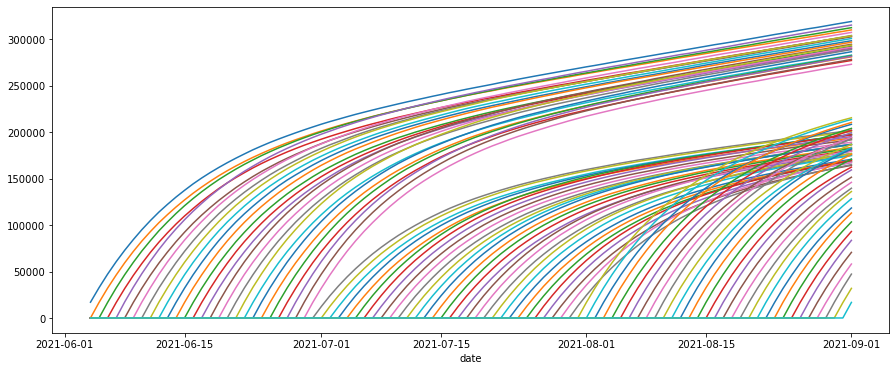

In [36]:
# а если посмотреть на графическое представление рассчитанных кумулятивных ARPU,
# то можно сделать интресное наблюдение - все когорты разбиваются на три группы
# такое поведение - тема отдельного анализа
cum_ARPU.plot(legend=None, figsize=(15,6))

### Основные выводы:
##### * во всех когортах кумулятивный ARPU с каждым днем снижается
##### * примерно через 2 недели - снижается очень резко
##### * все когорты пользователей делятся на три группы (визиуальное наблюдение) - причины этого являются темой для отдельного исследования
##### * в каждой когорте практически одинаковое кол-во пользователей (от 99 до 102) - причина этого возможна в том, что для тестового задания предоставлены не все данные, или существует некое ограничение на регистрацию новых пользователей
##### * в основном пользователи устанавливают одно приложение, и только 11% пользователей (853 из 7718) установили оба приложения
##### * есть пользователи, которые устанавливали одно и тоже приложение несколько раз - в причинах надо разбираться отдельно
##### * выручка за тысячу показов рекламы (eCPM) различная и зависит от типа рекламы, установленного приложения, страны и дня показа